In [ ]:
import csv
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
# Set the URL of the paginated webpage that you want to scrape
url = "https://www.airlinequality.com/airline-reviews/british-airways"

# Initialize an empty list to store the data that you scrape
data = []

# Setting the initial page number and the increment that you want to use to paginate through the webpage
page_num = 1
page_incr = 1
page_size = 100
# maximum number of pages to be scraped
max_pages = 20

# Set the URL of the webpage to be scraped
paginated_url = f"{url}/page/{page_num}/?sortby=post_date%3ADesc&pagesize={page_size}"

# A while loop to paginate through the webpage and scrape the data
while page_num <= max_pages:

    print(f"Scraping page {page_num}")

    # A GET request to the paginated URL
    response = requests.get(paginated_url)

    # Parsing the response using BeautifulSoup
    parsed_content = BeautifulSoup(response.text, "html.parser")

    # Finding all the elements on the page that contain the data to be scraped
    elements = parsed_content.find_all("div",class_ = "body")

    # Looping through the elements and extract the data that you want to scrape
    for element in elements:
        header = element.find("h2",class_ = "text_header").text.replace("\n", " ")
        sub_header = element.find("h3",class_ = "text_sub_header").text.replace("\n", " ")
        content = element.find("div",class_ = "text_content").text.replace("\n", " ")

        data.append([header,sub_header,content])

    # Increasing the page number and setting the paginated URL to the new page
    page_num += page_incr
    paginated_url = f"{url}/page/{page_num}/?sortby=post_date%3ADesc&pagesize={page_size}"

    print(f"   ---> {len(data)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [ ]:

#Coverting the list data into a dataframe
df = pd.DataFrame(data)
df.columns = ["REVIEW","PERSONAL INFO","CONTENT"]

#Removing unwanted text(first text preprocessing)
df.replace(re.compile(r'\s*✅ Trip Verified \|\s*'), '', inplace=True)
df

,REVIEW,PERSONAL INFO,CONTENT
0,"""one of the best BA First flights I’ve had""",Robert Bone (United Kingdom) 3rd April 2025,Not Verified | LHR T5 BA Gold Wing worked wel...
1,"""Very good service on this route""",J Jones (United Kingdom) 31st March 2025,Not Verified | Very good service on this rout...
2,"""disagreeable flight attendant""",10 reviews J Meares (United Kingdom) 19th...,Flight mainly let down by a disagreeable fligh...
3,"""flight was delayed nearly 1 hour""",Luis De Jesus (United States) 16th March 2025,Another awful experience by British Airways. T...
4,"""full of attitude to me""",Luis De Jesus (United States) 16th March 2025,"The service was rude, full of attitude to me, ..."
...,...,...,...
1995,"""Air Canada next time""",S Trickett (Canada) 16th March 2017,✅ Verified Review | Montreal to London Heathr...
1996,"""Will switch to Lufthansa""",T Sahlen (Sweden) 16th March 2017,✅ Verified Review | Gothenburg to San Francis...
1997,"""delayed 1 hour due to no cleaners""",T Madson (United Kingdom) 16th March 2017,✅ Verified Review | Gatwick to Mauritius. 12 ...
1998,"""an excellent flight""",Owen Griffiths (United Kingdom) 16th March 2017,"✅ Verified Review | San Diego to London, an e..."


In [ ]:
import os
if not os.path.exists("data"):
    os.makedirs("data")

df.to_csv(r"data/BA_reviews.csv")

In [ ]:
sentiment_analysis_df = df.drop(["REVIEW","PERSONAL INFO"], axis=1)
sentiment_analysis_df.replace(re.compile(r'\s*✅ Verified Review \|\s*'), '', inplace=True)
sentiment_analysis_df

,CONTENT
0,Not Verified | LHR T5 BA Gold Wing worked wel...
1,Not Verified | Very good service on this rout...
2,Flight mainly let down by a disagreeable fligh...
3,Another awful experience by British Airways. T...
4,"The service was rude, full of attitude to me, ..."
...,...
1995,Montreal to London Heathrow. Flight and servic...
1996,"Gothenburg to San Francisco via Heathrow, retu..."
1997,Gatwick to Mauritius. 12 hour flight delayed 1...
1998,"San Diego to London, an excellent flight with ..."


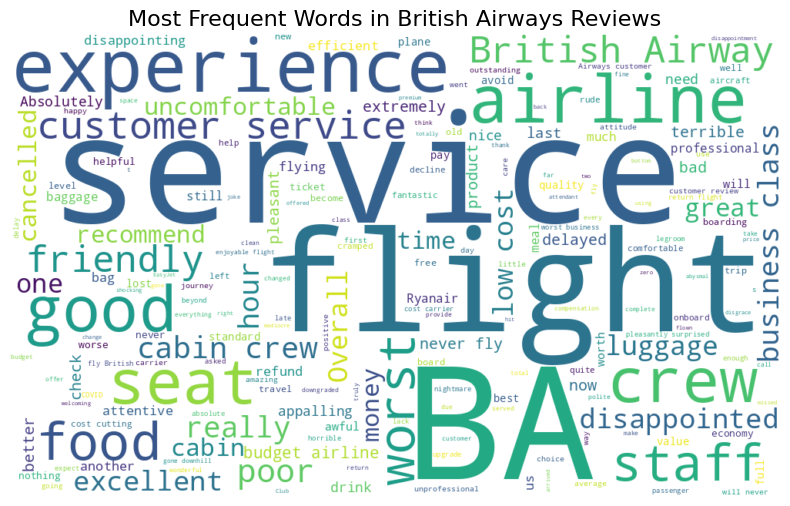

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("data/BA_reviews.csv")



# Combine all reviews into one big string
text = " ".join(df["REVIEW"].dropna().astype(str).tolist())

# Create the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='viridis').generate(text)

# Display it
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in British Airways Reviews", fontsize=16)
plt.show()


In [ ]:
sentiment_analysis_df.to_csv("data/sentiment_content.csv", index=False)

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import vader

sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
sentiment_analysis_df['SENTIMENT'] = sentiment_analysis_df['CONTENT'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
sentiment_analysis_df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,CONTENT,SENTIMENT
0,Not Verified | LHR T5 BA Gold Wing worked wel...,0.9950
1,Not Verified | Very good service on this rout...,-0.9119
2,Flight mainly let down by a disagreeable fligh...,-0.8845
3,Another awful experience by British Airways. T...,-0.8294
4,"The service was rude, full of attitude to me, ...",-0.4588
...,...,...
1995,Montreal to London Heathrow. Flight and servic...,0.3103
1996,"Gothenburg to San Francisco via Heathrow, retu...",-0.8545
1997,Gatwick to Mauritius. 12 hour flight delayed 1...,0.8958
1998,"San Diego to London, an excellent flight with ...",0.5709


In [ ]:
sentiment_analysis_df['SENTIMENT_TYPE'] = sentiment_analysis_df['SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
sentiment_analysis_df

,CONTENT,SENTIMENT,SENTIMENT_TYPE
0,Not Verified | LHR T5 BA Gold Wing worked wel...,0.9950,positive
1,Not Verified | Very good service on this rout...,-0.9119,negative
2,Flight mainly let down by a disagreeable fligh...,-0.8845,negative
3,Another awful experience by British Airways. T...,-0.8294,negative
4,"The service was rude, full of attitude to me, ...",-0.4588,negative
...,...,...,...
1995,Montreal to London Heathrow. Flight and servic...,0.3103,positive
1996,"Gothenburg to San Francisco via Heathrow, retu...",-0.8545,negative
1997,Gatwick to Mauritius. 12 hour flight delayed 1...,0.8958,positive
1998,"San Diego to London, an excellent flight with ...",0.5709,positive


In [ ]:
sentiment_analysis_df.to_csv("data/sentiment_content.csv", index=False)

Index(['CONTENT', 'SENTIMENT', 'SENTIMENT_TYPE'], dtype='object')


<ipython-input-39-7374f2b2cbf9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="SENTIMENT_TYPE", palette="Set2")


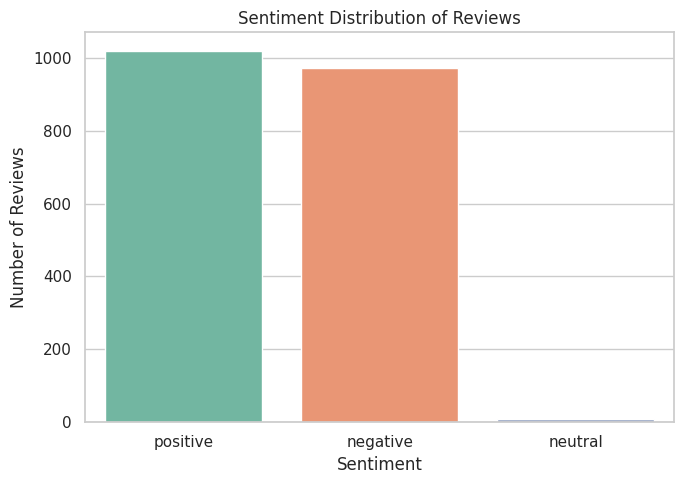

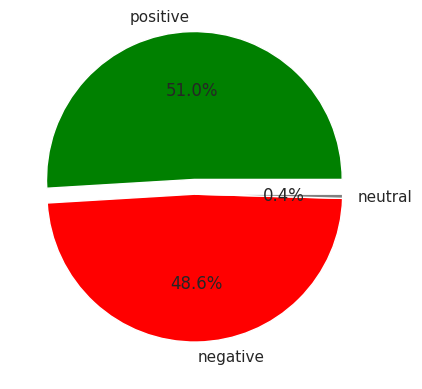

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with sentiment analysis
df = pd.read_csv("data/sentiment_content.csv")
print(df.columns)

# Plot style
sns.set(style="whitegrid")

# 1. Sentiment Distribution
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="SENTIMENT_TYPE", palette="Set2")
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

sentiment_type_percentages = sentiment_analysis_df['SENTIMENT_TYPE'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index,
    colors=['green', 'red', 'grey'],
    explode=[0.1, 0, 0],
    autopct='%1.1f%%'
    )

plt.show()
